### Importing the required libraries. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

# sklearn :: models
from sklearn.linear_model import LinearRegression

# sklearn :: evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')

### Loading the Dataset 

In [2]:
df = pd.read_csv('/Users/tania/Downloads/true_car_listings.csv')

In [3]:
df.dtypes

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object

In [4]:
print(df.columns)

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model'], dtype='object')


In [5]:
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


### Cleaning some data

Cleaning up the data a little to be able to break down the information a little more. We can extrct the information related to the transmission from the Model column. 

In [6]:
df['Transmission'] = df.Model.str.extract('(Speed|Automatic|Manual|Auto)')

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [7]:
df['Doors'] = df.Model.str.extract('(2dr|3dr|4dr|5dr|2-Door|3-Door|4-Door|5-Door|5-door|Coupe|Sedan|Hatchback|Hatch)')

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [8]:
df['Drive_Train'] = df.Model.str.extract('(AWD|RWD|FWD|2WD|4WD|4MOTION|quattro|REAR|4MATIC)')

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [9]:
df['Package'] = df.Model.str.extract('(Sport|Turbo|Premium|Platinum|Base|Standard|Supercharged|Covertible|Premier|Leather|Limited|Unlimited|Convenience|Dual|Special|Roadster|Police|Commercial|Fleet|Performance|Prestige|Eco|Touring|Cabriolet|Double|Executive|Certified|Edition|Reserve|Select|Hybrid|Luxury|Technology|Unmarked|Ultimate|4X4|Diesel|Rallye|GTS|Lux)')

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [10]:
df.sample(20)

,Price,Year,Mileage,City,State,Vin,Make,Model,Transmission,Doors,Drive_Train,Package
736338,20995,2015,23210,Miami,FL,JF2SJAFC9FH562391,Subaru,Forester2.5i,NaN,NaN,NaN,NaN
417050,14995,2012,67912,Schaumburg,IL,2HGFG4A55CH707748,Honda,Civic,NaN,NaN,NaN,NaN
633605,14987,2015,14971,Winston-Salem,NC,1N4AL3AP7FC186710,Nissan,Altima2.5,NaN,NaN,NaN,NaN
37459,28895,2014,43545,Great Neck,NY,WBA3B9G52ENR91027,BMW,3,NaN,NaN,NaN,NaN
750779,18358,2017,18109,Roanke,VA,4T1BF1FK5HU645507,Toyota,CamrySE,NaN,NaN,NaN,NaN
705682,21680,2013,41990,Cookeville,TN,3C6JR7AT5DG511689,Ram,"1500Tradesman,",NaN,NaN,NaN,NaN
614920,38440,2015,28927,Newnan,GA,WDDKJ6FB5FF300047,Mercedes-Benz,E-ClassE400,NaN,NaN,NaN,NaN
421011,22350,2013,75125,Duluth,GA,5FNYF3H57DB030090,Honda,PilotEX-L,NaN,NaN,NaN,NaN
30728,7930,2008,122643,Buford,GA,WBANW13508CZ77342,BMW,5,NaN,NaN,NaN,NaN
167608,23995,2006,141623,Dripping Springs,TX,1GCHK23D16F212290,Chevrolet,Silverado,NaN,NaN,NaN,NaN


In [11]:
df['Model'] = df['Model'].str.replace('-Speed', '')
df['Model'] = df['Model'].str.replace('-Automatic', '')
df['Model'] = df['Model'].str.replace('Speed', '')
df['Model'] = df['Model'].str.replace('Automatic', '')
df['Model'] = df['Model'].str.replace('Manual', '')
df['Model'] = df['Model'].str.replace('Auto', '')
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,Transmission,Doors,Drive_Train,Package
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6,Speed,NaN,NaN,NaN
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5,Speed,NaN,NaN,NaN
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6,Speed,NaN,NaN,NaN
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5,Speed,NaN,NaN,NaN
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILX,Automatic,NaN,NaN,NaN


In [12]:
df['Model'] = df['Model'].str.replace('2dr', '')
df['Model'] = df['Model'].str.replace('3dr', '')
df['Model'] = df['Model'].str.replace('4dr', '')
df['Model'] = df['Model'].str.replace('5dr', '')
df['Model'] = df['Model'].str.replace('2-Door', '')
df['Model'] = df['Model'].str.replace('3-Door', '')
df['Model'] = df['Model'].str.replace('4-Door', '')
df['Model'] = df['Model'].str.replace('5-Door', '')
df['Model'] = df['Model'].str.replace('5-door', '')
df['Model'] = df['Model'].str.replace('Coupe', '')
df['Model'] = df['Model'].str.replace('Sedan', '')
df['Model'] = df['Model'].str.replace('Hatchback', '')
df['Model'] = df['Model'].str.replace('Hatch', '')
df['Model'] = df['Model'].str.replace('AWD', '')
df['Model'] = df['Model'].str.replace('RWD', '')
df['Model'] = df['Model'].str.replace('FWD', '')
df['Model'] = df['Model'].str.replace('2WD', '')
df['Model'] = df['Model'].str.replace('4WD', '')
df['Model'] = df['Model'].str.replace('4MOTION', '')
df['Model'] = df['Model'].str.replace('quattro', '')
df['Model'] = df['Model'].str.replace('REAR', '')
df['Model'] = df['Model'].str.replace('4MATIC', '')

In [13]:
df['Model'] = df['Model'].str.replace('Sport', '')
df['Model'] = df['Model'].str.replace('Turbo', '')
df['Model'] = df['Model'].str.replace('Premium', '')
df['Model'] = df['Model'].str.replace('Platinum', '')
df['Model'] = df['Model'].str.replace('Base', '')
df['Model'] = df['Model'].str.replace('Standard', '')
df['Model'] = df['Model'].str.replace('Supercharged', '')
df['Model'] = df['Model'].str.replace('Convertible', '')
df['Model'] = df['Model'].str.replace('Premier', '')
df['Model'] = df['Model'].str.replace('Leather', '')
df['Model'] = df['Model'].str.replace('Limited', '')
df['Model'] = df['Model'].str.replace('Unlimited', '')
df['Model'] = df['Model'].str.replace('Convenience', '')
df['Model'] = df['Model'].str.replace('Dual', '')
df['Model'] = df['Model'].str.replace('Special', '')
df['Model'] = df['Model'].str.replace('Roadster', '')
df['Model'] = df['Model'].str.replace('Police', '')
df['Model'] = df['Model'].str.replace('Commercial', '')
df['Model'] = df['Model'].str.replace('Fleet', '')
df['Model'] = df['Model'].str.replace('Performance', '')
df['Model'] = df['Model'].str.replace('Prestige', '')
df['Model'] = df['Model'].str.replace('Eco', '')
df['Model'] = df['Model'].str.replace('Touring', '')
df['Model'] = df['Model'].str.replace('Cabriolet', '')
df['Model'] = df['Model'].str.replace('Double', '')
df['Model'] = df['Model'].str.replace('Executive', '')
df['Model'] = df['Model'].str.replace('Certified', '')
df['Model'] = df['Model'].str.replace('Edition', '')
df['Model'] = df['Model'].str.replace('Reserve', '')
df['Model'] = df['Model'].str.replace('Select', '')
df['Model'] = df['Model'].str.replace('Hybrid', '')
df['Model'] = df['Model'].str.replace('Luxury', '')
df['Model'] = df['Model'].str.replace('Technology', '')
df['Model'] = df['Model'].str.replace('Unmarked', '')
df['Model'] = df['Model'].str.replace('Ultimate', '')
df['Model'] = df['Model'].str.replace('Diesel', '')
df['Model'] = df['Model'].str.replace('Rallye', '')
df['Model'] = df['Model'].str.replace('GTS', '')
df['Model'] = df['Model'].str.replace('Lux', '')
df['Model'] = df['Model'].str.replace('4X4', '')
df['Model'] = df['Model'].str.replace(',', '')

In [14]:
df.Transmission = df.Transmission.fillna('')
df.Doors = df.Doors.fillna('')
df.Drive_Train = df.Drive_Train.fillna('')
df.Package = df.Package.fillna('')
df.sample(100)

,Price,Year,Mileage,City,State,Vin,Make,Model,Transmission,Doors,Drive_Train,Package
309145,31329,2016,24394,Rhinebeck,NY,1FM5K8DH7GGB57293,Ford,Explorer,,,4WD,
221010,7955,2005,140242,Buffalo,MN,1D7HA18D15S274368,Dodge,Ram,,,,
28559,20992,2014,43859,Coconut Creek,FL,WBA3B1G53ENS80048,BMW,3,,,,
776065,2488,2003,182246,Bedford,OH,JTDBE32K330233675,Toyota,Camry,,4dr,,
769458,14571,2014,43213,Cerritos,CA,JTDKN3DU2E0391491,Toyota,PriusTwo,,,,
360483,19997,2010,100492,Wallace,NC,1GTSKVE34AZ267514,GMC,Sierra,,,,
681249,22597,2014,37575,Schaumburg,IL,5N1AR2MM1EC715373,Nissan,PathfinderS,,,,
843272,18200,2016,4061,Aurora,CO,3VWF17AT3GM612366,Volkswagen,Beetle,,,,
26142,16993,2013,12952,Scottsdale,AZ,WBAUP7C56DVP25802,BMW,1,,,,
499547,20000,2012,58307,Freehold,NJ,1C4AJWAG8CL193128,Jeep,Wrangler,,,4WD,


In [15]:
# apply dummies on the training set
col = 'Make'
df_dummies = pd.get_dummies(df[col])
df_dummies.columns = [str(col)+'_'+str(c) for c in df_dummies.columns]
df = pd.concat([df, df_dummies], axis=1)

In [16]:
# apply dummies on the training set
col = 'Transmission'
df_dummies = pd.get_dummies(df[col])
df_dummies.columns = [str(col)+'_'+str(c) for c in df_dummies.columns]
df = pd.concat([df, df_dummies], axis=1)

In [17]:
# apply dummies on the training set
col = 'Model'
df_dummies = pd.get_dummies(df[col])
df_dummies.columns = [str(col)+'_'+str(c) for c in df_dummies.columns]
df = pd.concat([df, df_dummies], axis=1)

In [18]:
df.sample(100)

,Price,Year,Mileage,City,State,Vin,Make,Model,Transmission,Doors,...,Model_iM,Model_iQ,Model_iQ10th,Model_iQbase,Model_noline,Model_tC,Model_xA,Model_xB,Model_xB686,Model_xD
116764,6555,2012,109689,Pontiac,MI,2G1WF5E37C1192446,Chevrolet,ImpalaLS,,,...,0,0,0,0,0,0,0,0,0,0
816894,39888,2016,32193,Clermont,FL,5TFFW5F17GX198664,Toyota,Tundra,,,...,0,0,0,0,0,0,0,0,0,0
416531,15000,2012,104723,Brunswick,GA,5FNYF3H51CB033842,Honda,Pilot,,,...,0,0,0,0,0,0,0,0,0,0
771067,17900,2016,38851,Ephrata,PA,2T3BFREV5GW458431,Toyota,RAV4,,,...,0,0,0,0,0,0,0,0,0,0
781402,13995,2013,64354,Chicago,IL,4T3BA3BB3DU042556,Toyota,VenzaLE,,,...,0,0,0,0,0,0,0,0,0,0
763103,11998,2012,66682,Lakewood,NJ,4T1BF1FK4CU573031,Toyota,Camry,,4dr,...,0,0,0,0,0,0,0,0,0,0
841207,20980,2015,36050,Tacoma,WA,3VW2A7AU4FM030430,Volkswagen,Golf,,4-Door,...,0,0,0,0,0,0,0,0,0,0
338078,39999,2011,66199,Ellensburg,WA,1FT7W3BT1BED06927,Ford,Super,,,...,0,0,0,0,0,0,0,0,0,0
589489,19999,2015,6510,Waseca,MN,JM3KE4CY7F0525673,Mazda,CX-5,,,...,0,0,0,0,0,0,0,0,0,0
596912,19495,2013,19784,Great Neck,NY,WDDGF8AB1DR287450,Mercedes-Benz,C-ClassC300,,,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df.columns

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model',
       'Transmission', 'Doors',
       ...
       'Model_iM', 'Model_iQ', 'Model_iQ10th', 'Model_iQbase', 'Model_noline',
       'Model_tC', 'Model_xA', 'Model_xB', 'Model_xB686', 'Model_xD'],
      dtype='object', length=1919)

Selecting the columns and handling the missing values

In [20]:
X_columns = ['Year', 'Mileage', 'Make_AM',
       'Make_Acura', 'Make_Alfa', 'Make_Aston', 'Make_Audi', 'Make_BMW',
       'Make_Bentley', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Chrysler', 'Make_Dodge', 'Make_FIAT', 'Make_Ferrari',
       'Make_Fisker', 'Make_Ford', 'Make_Freightliner', 'Make_GMC',
       'Make_Genesis', 'Make_Geo', 'Make_HUMMER', 'Make_Honda', 'Make_Hyundai',
       'Make_INFINITI', 'Make_Isuzu', 'Make_Jaguar', 'Make_Jeep', 'Make_Kia',
       'Make_Lamborghini', 'Make_Land', 'Make_Lexus', 'Make_Lincoln',
       'Make_Lotus', 'Make_MINI', 'Make_Maserati', 'Make_Maybach',
       'Make_Mazda', 'Make_McLaren', 'Make_Mercedes-Benz', 'Make_Mercury',
       'Make_Mitsubishi', 'Make_Nissan', 'Make_Oldsmobile', 'Make_Plymouth',
       'Make_Pontiac', 'Make_Porsche', 'Make_Ram', 'Make_Rolls-Royce',
       'Make_Saab', 'Make_Saturn', 'Make_Scion', 'Make_Subaru', 'Make_Suzuki',
       'Make_Tesla', 'Make_Toyota', 'Make_Volkswagen', 'Make_Volvo','Make_smart', 'Model_500', 'Model_A3', 'Model_A4', 'Model_A5', 'Model_A6', 'Model_A7', 'Model_A8', 'Model_Acadia', 'Model_Accent', 'Model_Accord', 'Model_Amanti', 'Model_Astro', 'Model_Avalanche', 'Model_Avenger', 'Model_Aviator', 'Model_Bolt', 'Model_Caliber', 'Model_Camaro', 'Model_Canyon', 'Model_Cavalier', 'Model_Century', 'Model_Challenger', 'Model_Charger', 'Model_Cherokee', 'Model_Civic', 
'Model_CL', 'Model_Club', 'Model_Cobalt', 'Model_Colorado', 'Model_Commander', 'Model_Compass', 'Model_Concorde', 
'Model_Concours', 'Model_Continental','Model_Contour','Model_Corvette','Model_CR-V','Model_CR-Z','Model_Crossfire',
'Model_CrosstourEX', 'Model_Crown','Model_Cruze','Model_CT','Model_CTS','Model_Dakota','Model_Dart', 'Model_Denali','Model_DeVille','Model_DTS','Model_Durango','Model_E-Series','Model_Edge', 'Model_Elantra','Model_Eldorado','Model_Element','Model_Elise','Model_ELR','Model_Enclave','Model_Encore',
'Model_Entourage','Model_Envision','Model_Envoy','Model_Equinox','Model_Equus','Model_Escalade','Model_Escape',
'Model_Escort','Model_EX35','Model_Exige','Model_Expedition','Model_Explorer','Model_F-150',
'Model_F-250','Model_F-350','Model_F-TYPE','Model_FF','Model_Fiesta','Model_Fit','Model_Five','Model_Flex',
'Model_Flying','Model_Focus','Model_Forester','Model_Forte','Model_Freestar','Model_Freestyle','Model_Fusion',
'Model_FX35','Model_FX45','Model_FX50','Model_G20','Model_Gallardo','Model_General','Model_Genesis','Model_Grand',
'Model_GS','Model_GT','Model_GX','Model_HHR','Model_HR-V','Model_Huracan','Model_I30','Model_ILX',
'Model_Impala','Model_Impreza','Model_Insight','Model_Intrepid','Model_Ioniq','Model_IS','Model_Jimmy','Model_Journey',
'Model_K900','Model_Karma','Model_LaCrosse','Model_LeSabre','Model_Liberty','Model_LS','Model_Lucerne','Model_Lumina',
'Model_LX','Model_M2','Model_M3','Model_M35','Model_M37','Model_M4','Model_M5','Model_M56','Model_M6','Model_Magnum',
'Model_Malibu','Model_Mark','Model_Martin','Model_MDX','Model_MKC','Model_MKS','Model_MKT','Model_MKX','Model_MKZ',
'Model_Monte','Model_Mulsanne','Model_Murcielago','Model_Mustang','Model_Navigator','Model_Neon','Model_Nitro','Model_NSX',
'Model_Odyssey','Model_Optima','Model_Pacifica','Model_Patriot','Model_Pilot','Model_Prelude','Model_Prizm',
'Model_Prowler','Model_Q3','Model_Q40','Model_Q45','Model_Q5','Model_Q50','Model_Q60','Model_Q7','Model_QX30','Model_QX50',
'Model_QX56','Model_QX60','Model_QX70','Model_QX80','Model_R8','Model_Rainier','Model_Ram','Model_Ranger','Model_RDX',
'Model_Regal','Model_Rendezvous','Model_Renegade','Model_Ridgeline','Model_Rio','Model_Riviera','Model_RLX','Model_Rodeo',
'Model_Romeo','Model_Rondo','Model_Rover','Model_RS','Model_RS4','Model_RS6','Model_RSX','Model_RX','Model_S3','Model_S4',
'Model_S5','Model_S6','Model_S7','Model_S8','Model_Safari','Model_Santa','Model_Savana','Model_Sebring','Model_Sedona',
'Model_Sephia','Model_Seville','Model_Sierra','Model_Silverado','Model_Skylark','Model_SLX','Model_Sonata','Model_Sonic',
'Model_Sonoma','Model_Sorento','Model_Soul','Model_Spark','Model_Spectra','Model_Sprinter','Model_SQ5','Model_SRX',
'Model_Stratus','Model_STS','Model_Suburban','Model_Super','Model_Tahoe','Model_Taurus','Model_Terrain','Model_Terraza',
'Model_Thunderbird','Model_Tiburon','Model_TL','Model_TrailBlazer','Model_Transit','Model_Traverse','Model_Trax','Model_Trooper',
'Model_TSX','Model_TT','Model_TTS','Model_Tucson','Model_Uplander','Model_Veloster','Model_Venture','Model_Veracruz',
'Model_Verano','Model_Versa','Model_Viper','Model_Volt','Model_Voyager','Model_Windstar','Model_Wrangler','Model_X1',
'Model_X3','Model_X5','Model_X6','Model_XF','Model_XFR','Model_XFS','Model_XJ','Model_XKR',
'Model_XKXK','Model_XLR','Model_XT5','Model_XTS','Model_Yukon','Model_Z3','Model_Z4','Model_ZDX','Transmission_', 'Transmission_Auto',
'Transmission_Automatic', 'Transmission_Manual', 'Transmission_Speed']
y_column = ['Price']

### Model Training

We split the data using SKlearn

In [21]:
# split the data

df = df.sample(frac=1).reset_index(drop=True)

threshold = 0.8
absolute_threshold = int(len(df)*threshold)

X_train = df.iloc[:absolute_threshold][X_columns]
y_train = df.iloc[:absolute_threshold][y_column]

X_test = df.iloc[absolute_threshold:][X_columns]
y_test = df.iloc[absolute_threshold:][y_column]

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (681697, 328)
y_train (681697, 1)
X_test (170425, 328)
y_test (170425, 1)


In [22]:
# train a linear regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Model Evaluation

RMSE 7765.83


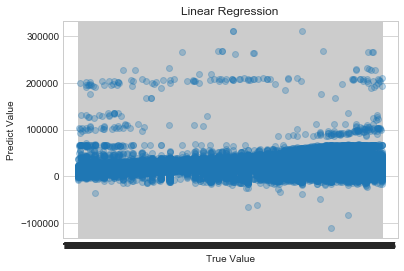

In [25]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE', round(rmse, 2))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
plt.title('Linear Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.show()

### Prepare Submission

In [ ]:
df_prediction = df[X_columns].fillna(0.0)
df['Price'] = model.predict(df_prediction)
df[['Make', 'Model', 'Year', 'Price']]

In [ ]:
df[['Make', 'Model', 'Year', 'Price']].to_csv('/Users/tania/Downloads/RegressionTesting_UsedCars.csv', index=False)

In [26]:
# save the model to a file
joblib.dump(model, '/Users/tania/Desktop/model.joblib')

['/Users/tania/Desktop/model.joblib']

In [27]:
# save the column names
joblib.dump(X_columns, '/Users/tania/Desktop/X_columns.joblib')

['/Users/tania/Desktop/X_columns.joblib']